 <!-- test -->


float32
채널 추가 후 훈련 데이터 형태:  (60000, 1, 28, 28)
채널 추가 후 테스트 데이터 형태:  (10000, 1, 28, 28)
Using mps device
FashionMNISTCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


/var/folders/s8/lmw_kzfn5hq4h_p45q6m9_6r0000gn/T/ipykernel_24261/969729942.py:194: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1741738245208/work/torch/csrc/utils/tensor_numpy.cpp:212.)
  train_labels_tensor = torch.from_numpy(train_labels).long()


Training starts...
Epoch [1/20], Batch [10/938], Loss: 1.6616
Epoch [1/20], Batch [20/938], Loss: 1.0901
Epoch [1/20], Batch [30/938], Loss: 1.0462
Epoch [1/20], Batch [40/938], Loss: 0.7273
Epoch [1/20], Batch [50/938], Loss: 0.6796
Epoch [1/20], Batch [60/938], Loss: 0.7855
Epoch [1/20], Batch [70/938], Loss: 0.6068
Epoch [1/20], Batch [80/938], Loss: 0.6533
Epoch [1/20], Batch [90/938], Loss: 0.5669
Epoch [1/20], Batch [100/938], Loss: 0.5586
Epoch [1/20], Batch [110/938], Loss: 0.4145
Epoch [1/20], Batch [120/938], Loss: 0.8441
Epoch [1/20], Batch [130/938], Loss: 0.6182
Epoch [1/20], Batch [140/938], Loss: 0.4460
Epoch [1/20], Batch [150/938], Loss: 0.6649
Epoch [1/20], Batch [160/938], Loss: 0.4577
Epoch [1/20], Batch [170/938], Loss: 0.6790
Epoch [1/20], Batch [180/938], Loss: 0.4860
Epoch [1/20], Batch [190/938], Loss: 0.3800
Epoch [1/20], Batch [200/938], Loss: 0.3528
Epoch [1/20], Batch [210/938], Loss: 0.4788
Epoch [1/20], Batch [220/938], Loss: 0.3220
Epoch [1/20], Batch [2

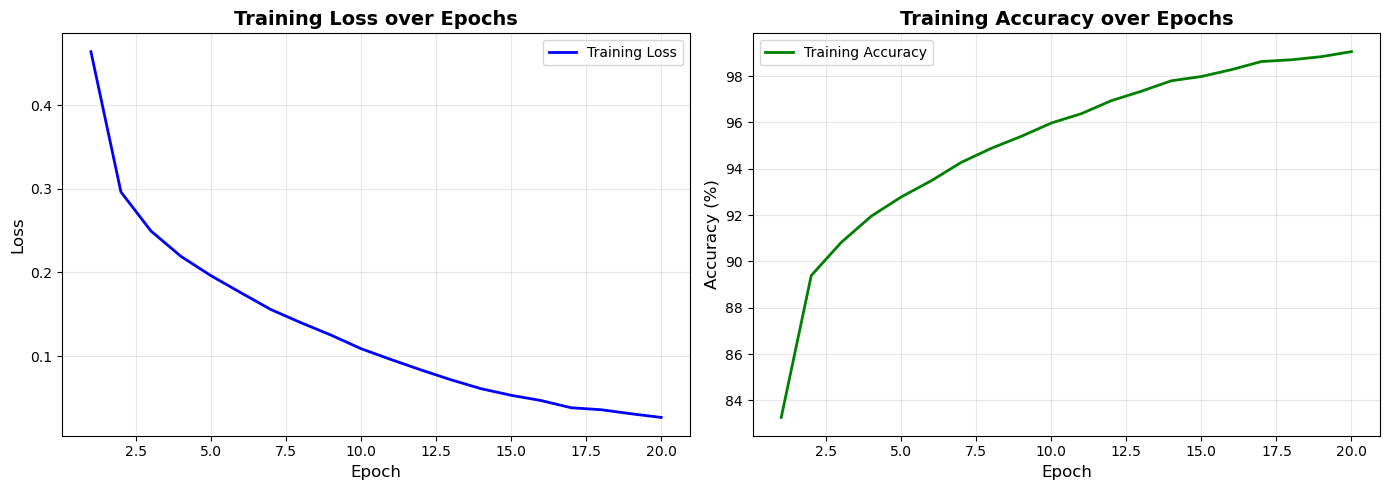

오차 행렬 (Confusion Matrix):
[[866   0  26  14   5   1  81   0   7   0]
 [  1 985   3   6   0   0   4   0   1   0]
 [ 19   1 855   3  79   0  41   0   2   0]
 [ 19   6  24 890  41   0  19   0   1   0]
 [  0   0  29  15 929   0  27   0   0   0]
 [  1   0   0   0   0 971   0  25   0   3]
 [ 95   0  51  25  77   0 748   0   4   0]
 [  0   0   0   0   0   3   0 986   0  11]
 [  3   1   0   1   3   1   1   2 988   0]
 [  0   0   1   0   0   7   0  36   0 956]]
혼동 행렬 저장 완료: images/confusion_matrix.png


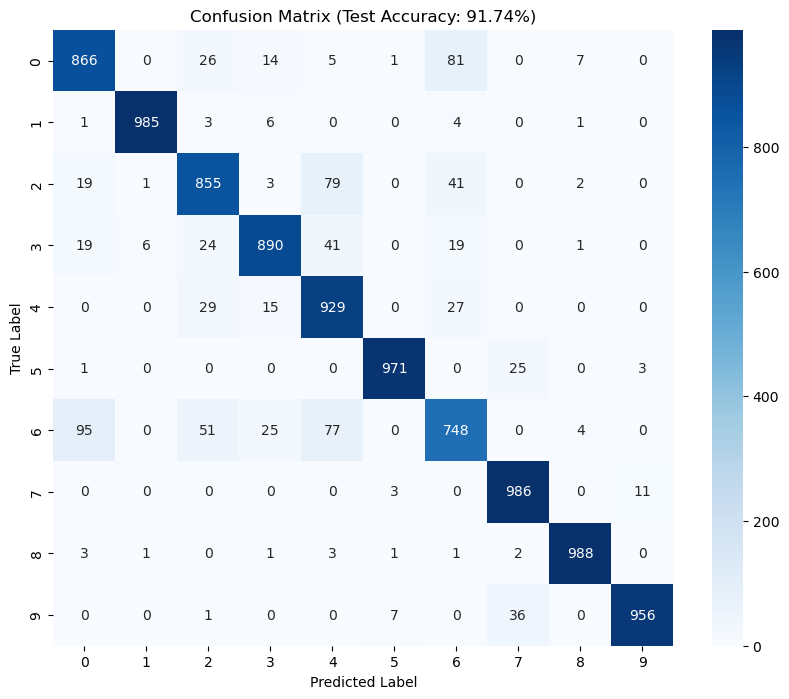

In [1]:
# 1. 문제 정의 및 데이터 준비
# 문제: Fashion-MNIST 데이터셋을 사용하여 10가지 종류의 의류 이미지를 정확하게 분류하는 이미지 분류(Image Classification) 모델을 만듭니다.
# 데이터: 캐글(Kaggle)에서 다운로드할 수 있는 Fashion-MNIST 데이터셋을 사용합니다. 이 데이터셋은 훈련용 이미지 60,000개와 테스트용 이미지 10,000개로 구성되어 있으며, 각 이미지는 28×28 픽셀의 흑백 이미지입니다.

# 2. 데이터 로딩 및 전처리
# 2.1. 데이터 로드
# 바이너리 파일 형태로 저장되어 gzip, numpy 라이브러리를 사용.
import numpy as np
import os
# import gzip # 이미 압축해제 되어 있어서 필요 없음
train_images_path = '/Users/ys/Library/Mobile Documents/com~apple~CloudDocs/Study/AI/Kaggle/kaggle-projects/fashion-mnist/data/train-images-idx3-ubyte'
train_labels_path = '/Users/ys/Library/Mobile Documents/com~apple~CloudDocs/Study/AI/Kaggle/kaggle-projects/fashion-mnist/data/train-labels-idx1-ubyte'
test_images_path = '/Users/ys/Library/Mobile Documents/com~apple~CloudDocs/Study/AI/Kaggle/kaggle-projects/fashion-mnist/data/t10k-images-idx3-ubyte'
test_labels_path = '/Users/ys/Library/Mobile Documents/com~apple~CloudDocs/Study/AI/Kaggle/kaggle-projects/fashion-mnist/data/t10k-labels-idx1-ubyte'

# 이미지 저장 폴더 생성
os.makedirs('images', exist_ok=True)

# offset은 파일의 특정 위치부터 데이터를 읽기 시작하라고 알려주는 기능입니다. Fashion-MNIST 데이터셋의 바이너리 파일은 이미지 데이터나 라벨 데이터가 시작되기 전에, 데이터에 대한 메타정보가 담긴 **헤더(header)**를 가지고 있습니다. 이 헤더 정보를 건너뛰고 순수한 데이터만 읽기 위해 offset을 사용하는 것이죠.
# 이미지 파일 로드 함수 (압축 해제된 파일용)
def load_mnist_images(path:str):
    with open(path, 'rb') as f:
        # 이미지 파일 헤더(16바이트)를 건너뛰고 나머지 데이터를 읽음
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    # 28x28 이미지 크기로 재구성
    return data.reshape(-1, 28, 28)
# 라벨 파일 로드 함수 (압축 해제된 파일용)
def load_mnist_labels(path:str):
    with open(path, 'rb') as f:
        # 라벨 파일 헤더(8바이트)를 건너뛰고 나머지 데이터를 읽음
        return np.frombuffer(f.read(), dtype=np.uint8, offset=8)
# 함수를 사용해 데이터 로드
train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)
# print(f"훈련용 이미지 데이터의 형태: {train_images.shape}")
# print(f"훈련용 라벨 데이터의 형태: {train_labels.shape}")
# print(f"테스트용 이미지 데이터의 형태: {test_images.shape}")
# print(f"테스트용 라벨 데이터의 형태: {test_labels.shape}")

# 3. 데이터 전처리 및 시각화
# 3.1. 이미지 데이터 시각화
import matplotlib.pyplot as plt
# # 3.1.1. train_images에 저장된 첫 번째 이미지 데이터를 선택
# image_to_visualize = train_images[0]
# # 3.1.2. 이미지 시각화를 위해 plt.imshow() 함수를 사용합니다.
# # imshow() 함수는 배열 형태의 데이터를 이미지로 보여주는 역할을 해요.
# # cmap=plt.cm.binary 옵션은 이미지를 흑백으로 나타내라는 의미입니다.
# plt.imshow(image_to_visualize, cmap=plt.cm.binary) # pyright: ignore[reportAttributeAccessIssue]
# # 3.1.3. plt.colorbar() 함수를 사용해 이미지의 픽셀 값 분포를 나타내는 컬러바를 추가합니다.
# # 픽셀 값이 0(검은색)부터 255(흰색)까지 어떻게 분포하는지 한눈에 확인 가능.
# plt.colorbar()
# # 3.1.4. plt.grid(False)를 사용해 이미지 위에 격자가 보이지 않도록 설정합니다.
# #    기본적으로 격자가 나타나는데, 이미지를 깔끔하게 보기 위해 제거하는 거예요.
# plt.grid(False)
# # 3.1.5. plt.show()를 호출해 최종적으로 시각화된 이미지를 화면에 표시합니다.
# plt.show()
# # 3.1.6. 마지막으로, 첫 번째 이미지의 라벨(정답)을 출력합니다.
# #    train_labels는 각 이미지의 정답 배열.
# print(f"첫 번째 이미지의 라벨: {train_labels[0]}")

# 4. 정규화
train_images_normalized = train_images.astype(np.float32) / 255.0
test_images_normalized = test_images.astype(np.float32) / 255.0
# 결과 데이터 형식 확인.
print(train_images_normalized.dtype)  # unint8: unsigned(부호가 없는) int8
# 4.1 채널 차원 추가 # 흑백이므로 1, 컬러의 경우 3
train_images_normalized = train_images_normalized[:, np.newaxis, :, :]  # np.newaxis 는 인덱싱 키워드
test_images_normalized = test_images_normalized[:, np.newaxis, :, :]
# 결과 확인
print(f"채널 추가 후 훈련 데이터 형태:  {train_images_normalized.shape}")
print(f"채널 추가 후 테스트 데이터 형태:  {test_images_normalized.shape}")

# 5. 모델 학습
import torch
import torch.nn as nn
import torch.nn.functional as F


# 5.1. FashionMNIST 모델 클래스 정의
# PyTorch에서는 nn.Module을 상속받아 모델을 클래스 형태로 만듭니다.
# 이렇게 하면 모델의 구조와 동작을 체계적으로 관리할 수 있어요.
class FashionMNISTModel(nn.Module):
    # 5.1.2. 모델의 각 층(layer) 정의
    # __init__ 함수에서 모델의 구성 요소를 미리 정의합니다.
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        # 5.1.2.1. Flatten 레이어: 28*28 이미지를 784 픽셀의 1차원 벡터로 변환
        self.flatten = nn.Flatten()
        # 5.1.2.2. 첫 번째 Dense(Linear) 레이어
        # 784개의 입력을 받아 128개의 뉴런을 가진 층으로 연결.
        # self.fc1 = nn.Linear(28 * 28, 128) # 기존 1층
        ### 9.1.1. 첫 번째 층 뉴런 수 증가
        self.fc1 = nn.Linear(28 * 28, 256)  # 기존 1층에서 뉴런 수 증가(256)
        # 5.1.2.3. 두 번째 Dense(Linear) 레이어
        # 128개의 입력을 받아 10개의 출력 뉴런을 가진 층으로 연결
        # Fashion-MNIST의 클래스가 10개이기 때문
        # self.fc2 = nn.Linear(128, 10) # 기존 2층
        ### 9.1.2. 새로운 중간 층을 추가하고 출력층을 3번째로 이동.
        self.fc2 = nn.Linear(256, 128)  # 새로운 중간 층을  추가
        self.fc3 = nn.Linear(128, 10)  # 출력층 3층으로 이동.

    # 5.1.3. 모델의 순전파(foward pass) 정의
    # 이 함수는 입력 데이터가 모델의 층을 통과하는 순서를 정의
    # 데이터가 어떤 과정을 거쳐 최종 결과로 나오는지 결정.
    def forward(self, x):
        # 5.1.3.1. 입력 이미지를 1차원으로 펼침.
        x = self.flatten(x)
        # 5.1.3.2. 첫 번째 완전 연결 층을 통과, relu 활성화 함수를 적용
        # ReLu는 활성화 함수이다. 음수 값을 0으로 만들고 양수 값을 그대로 통과시켜 비선형성을 부여.
        x = F.relu(self.fc1(x))
        # 5.1.3.3. 두 번째 완전 연결 층을 통과시켜 최종 결과를 얻는다.
        # 이 단계의 출력은 각 클래스에 대한 '점수'
        # x = self.fc2(x) # 기존 출력 층
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # 출력 층
        # 5.1.3.4. 최종 결과는 나중에 손실 함수(CrossEntropyLoss)에서 Softmax를 내부적으로 계산
        # Softmax를 직접 적용하지는 않는다.
        return x


# 5.2. FashionMNIST CNN 모델 클래스 정의
class FashionMNISTCNN(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN, self).__init__()
        # 첫 번째 합성곱 블록
        # 입력: (1, 28, 28) → 출력: (32, 28, 28)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        # 풀링 후: (32, 28, 28) → (32, 14, 14)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 두 번째 합성곱 블록
        # 입력: (32, 14, 14) → 출력: (64, 14, 14)
        self.conv2 = nn.Conv2d(
            in_channels=32, out_channels=64, kernel_size=3, padding=1
        )
        # 풀링 후: (64, 14, 14) → (64, 7, 7)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 완전 연결 레이어
        # 64 * 7 * 7 = 3136
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 첫 번째 블록: Conv → ReLU → Pool
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        # 두 번째 블록: Conv → ReLU → Pool
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        # Flatten: (batch, 64, 7, 7) → (batch, 3136)
        x = x.view(-1, 64 * 7 * 7)
        # 완전 연결 레이어
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# 6. 모델 컴파일
# 6.0. GPU(MPS) 사용 가능 여부 확인 및 장치 설정.
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")
# 6.1. 모델 인스턴스 생성
# 이제 우리가 정의한 FasionMNISTModel 클래스를 사용해 실제 모델 객체를 생성.
# 위에서 설정한 장치(GPU 또는 CPU)로 모델을 보냅니다.
# 이렇게 해야 모델의 가중치가 GPU 메모리에 올라가 GPU 연산을 사용할 수 있습니다.
# model = FashionMNISTModel().to(device) # FashionMSTR 모델
model = FashionMNISTCNN().to(device)  # FashionMSTR CNN 모델
# 6.2. 모델 구조 출력
print(model)
import torch.optim as optim
# 6.3. 손실 함수 정의
# 모델의 예측과 실제 라벨 간의 오차를 계산하는 함수.
# 다중 클래스 분류 문제에는 CrossEntropyLoss가 가장 널리 사용.
# PyTorch의 이 손실 함수는 내부적으로 Softmax를 포함.
loss_function = nn.CrossEntropyLoss()
# 6.4. 옵티마이저 정의
# 모델의 가중치를 업데이트하여 손실을 최소화하는 역할.
# Adam은 현재 딥러닝에서 가장 많이 사용되는 옵티마이저 중 하나.
# - model.parameters()는 모델이 학습할 모든 가중치와 편향을 넘겨주는 역할
# - lr(learning rate)는 경사 하강법에서 한 번에 움직이는 보폭의 의미
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# 9.2. 하이퍼파라미터 튜닝
# optimizer = optim.Adam(model.parameters(), lr=0.01) # 학습률 크게 증가.
optimizer = optim.Adam(model.parameters(), lr=0.0008)  # 학습률 크게 감소.

# 7. 학습루프 생성.
from torch.utils.data import DataLoader, TensorDataset
# 7.1. 데이터셋 및 데이터로더 생성
# 정규화된 numpy 배열 데이터를 PyTorch의 Tensor로 변환.
train_images_tensor = torch.from_numpy(train_images_normalized)
train_labels_tensor = torch.from_numpy(train_labels).long()
# TensorDataset은 이미지와 라벨 텐서를 묶어 데이터셋을 만듭니다.
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
# DataLoader는 학습 시 데이터를 배치(batch) 단위로 불러오는 역할을 합니다.
# shuffle=True는 매 에포크마다 데이터를 무작위로 섞어 모델의 과적합을 방지합니다.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 학습 history 저장
history = {
    'train_loss': [],
    'train_acc': []
}

# 7.2. 모델을 장치로 이동
# 모델을 CPU 또는 GPU/MPS로 옮겨줍니다.
model.to(device)
# 7.3. 학습 루프(Training Loop)
# num_epochs = 5
# 9.3. 에포크 수정
num_epochs = 20
print("Training starts...")
# 각 에포크의 시작에서 모델을 학습 모드로 설정합니다.
# 이렇게 하면 드롭아웃 등 학습 시에만 필요한 기능들이 활성화됩니다.
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    # 데이터로더에서 이미지와 라벨을 배치 단위로 가져옵니다.
    for batch_idx, (images, labels) in enumerate(train_loader):
        # 데이터를 설정한 장치(device)로 보냅니다.
        images = images.to(device)
        labels = labels.to(device)
        # 7.3.1 기울기 초기화
        # 이전 배치 학습에서 계산된 기울기를 0으로 초기화합니다.
        # 이 과정이 없으면 기울기가 계속 누적되어 학습이 이상해집니다.
        optimizer.zero_grad()
        # 7.3.2. 순전파(Foward Pass)
        # 모델에 이미지 데이터를 넣어 예측값을 계산합니다.
        outputs = model(images)
        # 7.3.3. 손실 계산(Loss Calculation)
        # 예측값과 실제 라벨을 비교해 손실(오차)을 계산
        loss = loss_function(outputs, labels)
        # 7.3.4. 역전파(Backward Pass)
        # 손실을 기반으로 각 매개변수에 대한 기울기를 계산
        loss.backward()
        # 7.3.5. 가중치 업데이트(Weight Update)
        # 계산된 기울기를 사용해 모델의 가중치를 업데이트
        optimizer.step()
        
        # 누적 손실 및 정확도 계산
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # 개별 배치 Loss 출력 (10회마다)
        if (batch_idx + 1) % 10 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}"
            )
    # 에포크 평균 Loss 및 Accuracy 출력
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    history['train_loss'].append(avg_loss)
    history['train_acc'].append(accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
    print("-" * 60)  # 구분선
print("Training finished!")

# 8. 모델 평가
# 8.1. 모델을 평가 모드로 설정.
# model.eval()은 학습 시에만 필요한 기능(예: Dropout, Batch Normalization)을 비활성화합니다.
# 이렇게 해야 모델이 일관된 예측 결과를 내놓을 수 있습니다.
model.eval()
# 8.2. 기울기 계산 비활성화
# torch.no_grad() 블록 안에서는 기울기 계산이 이루어지지 않습니다.
# 평가 단계에서는 가중치를 업데이트할 필요가 없으므로, 메모리와 연산 속도를 절약할 수 있습니다.
# 8.2.1. 테스트 데이터셋 및 데이터로더 생성
# 테스트 이미지와 라벨을 PyTorch 텐서로 변환
test_images_tensor = torch.from_numpy(test_images_normalized)
test_labels_tensor = torch.from_numpy(test_labels).long()
# TensorDataset으로 묶고 DataLoader를 생성
# 평가 시에는 데이터 순서를 섞을 필요가 없으므로 suffle=False로 설정.
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
# 8.2.2. 정확도(Accuracy) 계산을 위한 변수 초기화(기울기 계산 비활성화 블록)
correct_predictions = 0
total_samples = 0
# 8.2.3. 테스트 데이터로 순전파 실행.
# 테스트 데이터로더에서 배치 단위로 데이터를 가져옵니다.
for images, labels in test_loader:
    # 데이터와 라벨을 설정한 장치(device)로 보냅니다.
    images = images.to(device)
    labels = labels.to(device)
    # 8.2.3.1. 순전파: 모델에 데이터를 넣어 예측값 얻음.
    outputs = model(images)
    # 8.2.3.2. 예측값 변환
    # outputs은 각 클래스에 대한 점수입니다. 가장 높은 점수를 가진 클래스를 예측값으로 선택합니다.
    # torch.max() 함수는 최댓값과 그 인덱스를 반환합니다. dim=1은 각 행(이미지)에서 최댓값을 찾으라는 의미입니다.
    _, predicted = torch.max(outputs.data, 1)
    # 8.2.3.3. 정확한 예측 수 계산
    # 총 샘플 수를 업데이트
    total_samples += labels.size(0)
    # 예측값과 실제 라벨이 일치하는 개수를 세어 누적
    correct_predictions += (predicted.view(-1) == labels.view(-1)).sum().item()
# 8.2.4. 정확도 계산 및 출력
# (정확히 예측한 샘플 수) / (총 샘플 수)를 계산하여 정확도를 얻습니다.
accuracy = 100 * correct_predictions / total_samples
print(f"Test Accuracy: {accuracy:.2f}%")
print("Evaluation finished!")

# 학습 곡선 시각화 및 저장
print("학습 곡선 생성 중...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss 그래프
ax1.plot(range(1, num_epochs + 1), history['train_loss'], 'b-', linewidth=2, label='Training Loss')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss over Epochs', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy 그래프
ax2.plot(range(1, num_epochs + 1), history['train_acc'], 'g-', linewidth=2, label='Training Accuracy')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Training Accuracy over Epochs', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/learning_curves.png', dpi=150, bbox_inches='tight')
print("학습 곡선 저장 완료: images/learning_curves.png")
plt.show()

# 8.2.5.1. 오차 행렬
from sklearn.metrics import confusion_matrix
import seaborn as sns

model.eval()  # 모델을 평가 모드로 설정.
# 8.2.5.2. 예측값과 실제 라벨 수집
# 전체 테스트 데이터셋에 대한 예측값과 실제 라벨을 저장할 리스트를 만듦.
all_predictions = []
all_labels = []
# 기울기 계산을 비활성화하고 평가를 진행.
with torch.no_grad():
    for images, labels in test_loader:
        # 데이터와 라벨을 장치로 보냅니다.
        images, labels = images.to(device), labels.to(device)
        # 순전파: 모델에 이미지를 넣어 예측값을 얻습니다.
        outputs = model(images)
        # 예측값 변환: 가장 높은 점수를 가진 클래스의 인덱스를 예측값으로 선택합니다.
        _, predicted = torch.max(outputs.data, 1)
        # 텐서를 CPU로 옮겨 NumPy 배열로 변환하고 리스트에 추가합니다.
        # Scikit-learn은 PyTorch 텐서 대신 NumPy 배열을 입력으로 받습니다.
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
# 8.2.5.3. 오차 행렬 생성
# confusion_matrix 함수를 사용해 예측값과 실제 라벨로 오차 행렬을 만듭니다.
# 오차 행렬은 Numpy 배열 형태로 반환됩니다.
cm = confusion_matrix(all_labels, all_predictions)
print("오차 행렬 (Confusion Matrix):")
print(cm)
# 8.2.5.4. 오차 행렬 시각화
# Seaborn 라이브러리를 사용해 오차 행렬을 히트맵 형태로 시각화합니다.
# fmt='d'는 값을 정수 형태로 표시하라는 의미입니다.
# annot=True는 각 셀에 숫자를 표시하라는 의미입니다.
plt.figure(figsize=(10, 8))
tick_labels = [str(i) for i in range(10)]
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=tick_labels,
    yticklabels=tick_labels,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Test Accuracy: {accuracy:.2f}%)")
plt.savefig('images/confusion_matrix.png', dpi=150, bbox_inches='tight')
print("혼동 행렬 저장 완료: images/confusion_matrix.png")
plt.show()

# 9. 성능 개선
# 9.1 모델 구조 변경
# 모델에 층을 추가.
# ** 구현을 5.2. 모델 설정에서 수정.
# 9.1.1. 첫 번째 층 뉴런 수 증가
# 9.1.2. 새로운 중간 층을 추가하고 출력층을 3번째로 이동.
# 9.2. 하이퍼파라미터 튜닝(학습률)
# ** 구현을 6.4. 옵티마이저 정의를 수정.

1. 데이터 로드 및 전처리
   - 정규화 (0~1)
   - 채널 차원 추가 (60000, 1, 28, 28)

2. CNN 모델 정의
   - Conv1: 1→32, Pool1
   - Conv2: 32→64, Pool2
   - FC1: 3136→128
   - FC2: 128→10

3. 모델 컴파일
   - Loss: CrossEntropyLoss
   - Optimizer: Adam (lr=0.0008)

4. 학습
   - Epochs: 20
   - Batch size: 64

5. 평가
   - 정확도: 91.84%
   - 오차 행렬 시각화

채널이 늘어난다고 하더라도 풀링을 진행하여 단순화가 진행되면 좀 더 복잡도 높은 내용을 학습시킬수가 없는거 아니야?

와! 정말 날카로운 질문입니다! 🤯

이건 CNN을 처음 배울 때 많은 사람들이 혼란스러워하는 **역설적인 부분**이에요!

---

## **역설처럼 보이는 상황**

### **님의 의문:**

> "풀링으로 크기를 줄이면 (28×28 → 14×14 → 7×7) 정보가 줄어드는데, 어떻게 더 복잡한 내용을 학습할 수 있어?"

**직관적으로는 이상해 보입니다!** 🤔

---

## **핵심 개념: 무엇이 "복잡도"인가?**

### **오해: 픽셀 개수 = 복잡도 ❌**

```
28×28 = 784 픽셀  → 단순하다?
7×7 = 49 픽셀     → 복잡하다?
```

**이건 틀렸습니다!**

---

### **진실: 추상화 수준 = 복잡도 ✅**

```
낮은 추상화 (초기 레이어):
- 픽셀 하나하나를 봄
- "이 픽셀이 밝다/어둡다"
- 간단한 정보, 많은 데이터

높은 추상화 (후기 레이어):
- 픽셀 조합의 의미를 봄
- "여기에 어깨선이 있다"
- 복잡한 정보, 적은 데이터
```

---

## **비유로 이해하기**

### **책 읽기 비유:**

**낮은 레벨 (글자):**
```
"ㄱ", "ㅏ", "ㅁ", "ㅅ", "ㅏ"
→ 5개 요소 (많음)
→ 간단한 정보 (단순함)
```

**높은 레벨 (단어):**
```
"감사"
→ 1개 요소 (적음)
→ 복잡한 정보 (의미 포함)
```

**더 높은 레벨 (문장):**
```
"감사합니다"
→ 더 적은 요소
→ 더 복잡한 의미 (예의, 감정 포함)
```

---

## **CNN에서의 실제 과정**

### **Conv1 + Pool1: 저수준 특징 추출**

```python
입력: (1, 28, 28) = 784개 픽셀 값
# 각 픽셀: "이 위치가 밝은가?"

↓ Conv1 (32 필터)

(32, 28, 28) = 25,088개 값
# 각 값: "이 위치에 수평선이 있는가?"
#        "이 위치에 수직선이 있는가?"
#        "이 위치에 대각선이 있는가?"
# → 32가지 간단한 패턴 정보

↓ Pool1

(32, 14, 14) = 6,272개 값
# "이 영역에 수평선이 있는가?" (위치 덜 중요)
# → 공간 해상도는 낮지만 패턴 정보는 유지!
```

---

### **Conv2 + Pool2: 고수준 특징 추출**

```python
입력: (32, 14, 14)
# 각 채널: 이미 "선", "모서리" 같은 패턴 정보

↓ Conv2 (64 필터)

(64, 14, 14)
# 32개 저수준 패턴을 조합!
# 필터 1: "수평선 + 수직선" → 직각 코너 감지
# 필터 2: "여러 곡선" → 둥근 형태 감지
# 필터 3: "대각선 + 곡선" → 어깨선 감지
# → 64가지 복잡한 조합 패턴!

↓ Pool2

(64, 7, 7) = 3,136개 값
# "이 영역에 어깨선이 있는가?"
# "이 영역에 목선이 있는가?"
# → 위치 정보는 줄지만, 의미적 정보는 더 풍부!
```

---

## **핵심: 정보의 "밀도"가 증가한다**

### **정보량 vs 정보 밀도**

```
초기 레이어:
(1, 28, 28) = 784개
- 정보량: 많음 (784개 값)
- 정보 밀도: 낮음 (단순 밝기)
- 의미: "픽셀 하나하나의 밝기"

후기 레이어:
(64, 7, 7) = 3,136개
- 정보량: 더 많음! (3,136개 값)
- 정보 밀도: 매우 높음 (추상화된 개념)
- 의미: "64가지 복잡한 패턴의 존재 여부"
```

---

## **시각화: 레이어별 "보는" 것**

### **입력 이미지: 티셔츠**

```
원본 픽셀: (1, 28, 28)
[0, 0, 0, 45, 67, 89, ...]
→ "이 좌표의 밝기 값"
```

### **Conv1 출력: (32, 28, 28)**

```
채널 1: 수평선 맵
[0, 0, 0.8, 0, 0, ...]
→ "여기에 수평선이 강하게 나타남"

채널 2: 수직선 맵
[0.9, 0, 0, 0, 0.7, ...]
→ "여기에 수직선이 강하게 나타남"

...32개 간단한 패턴 맵
```

### **Pool1 출력: (32, 14, 14)**

```
"대략 이 영역에 수평선이 있음" (위치 조금 모호)
→ 세부 위치보다 "존재 여부"에 집중
```

### **Conv2 출력: (64, 14, 14)**

```
채널 1: 직각 코너 맵
→ "수평선 + 수직선 조합"

채널 5: 어깨 형태 맵
→ "특정 곡선 + 대각선 조합"

채널 20: 목선 형태 맵
→ "여러 패턴의 복잡한 조합"

...64개 복잡한 패턴 맵
```

### **Pool2 출력: (64, 7, 7)**

```
"이 넓은 영역에 어깨 형태가 있음"
→ 정확한 위치는 모르지만
→ "어깨가 있다"는 추상적 개념은 명확!
```

---

## **왜 이게 가능한가?**

### **1. 채널 증가가 정보 손실을 보상**

```
크기: 28×28 → 14×14 (÷4 감소)
채널: 32 → 64 (×2 증가)

총 값 개수:
32 × 14 × 14 = 6,272
64 × 14 × 14 = 12,544 (오히려 증가!)
```

---

### **2. 추상화가 정보를 압축**

```
저수준:
"(10,15) 밝음, (10,16) 어두움, (10,17) 밝음..."
→ 수백 개 픽셀 정보 필요

고수준:
"어깨선 있음"
→ 하나의 값으로 표현 가능
```

**비유:**
- "ㄱ,ㅏ,ㅁ,ㅅ,ㅏ,ㅎ,ㅏ,ㅂ,ㄴ,ㅣ,ㄷ,ㅏ" (12개)
- "감사합니다" (1개) ← 더 적지만 더 많은 의미!

---

## **실제 증거: 특징 맵 시각화**

연구자들이 CNN 레이어를 시각화한 결과:

### **Conv1 (초기):**
- 간단한 엣지, 색상, 텍스처

### **Conv2-3 (중간):**
- 눈, 코, 귀 같은 부분적 특징

### **Conv4-5 (후기):**
- 얼굴 전체, 자동차 전체 같은 복잡한 객체
- **픽셀은 적지만 더 복잡한 개념!**

---

## **핵심 정리**

### **님의 질문:**
> "풀링으로 단순화되면 복잡한 내용 학습 불가 아니야?"

### **답변:**

**❌ 오해:**
- 픽셀 수 감소 = 정보 감소 = 복잡도 감소

**✅ 진실:**
- 픽셀 수 감소 = 공간 해상도 감소
- 채널 수 증가 = 추상화 수준 증가
- **결과: 더 복잡한 개념을 학습!**

---

### **비유 정리:**

```
초기: "숲을 이루는 나무 한 그루 한 그루"
     → 많은 정보, 단순한 의미

후기: "이건 소나무 숲이다"
     → 적은 정보, 복잡한 의미
```

---

### **수학적 관점:**

```
정보량 = 값의 개수 × 각 값의 의미 복잡도

초기: 784 × 1 (밝기) = 784 units
후기: 3,136 × 100 (추상 개념) = 313,600 units

→ 오히려 증가!
```

---

**정말 본질을 꿰뚫는 질문이었습니다!** 🎉

이제 **풀링으로 크기는 줄지만, 추상화로 복잡도는 증가**한다는 걸 이해하셨나요?

**또 궁금한 점 있으신가요?** 😊